In [2]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score

In [3]:
# Importar os dados

dados = {}

regioes = ['regiao_1','regiao_2','regiao_3']
datasets = ['geo_data_0.csv','geo_data_1.csv','geo_data_2.csv']

for i, region in enumerate(regioes):
    try:
        dados[region] = pd.read_csv(datasets[i])
    except:
        dados[region] = pd.read_csv(f'/datasets/{datasets[i]}')

In [4]:
for regiao in regioes:
    print('\033[1m')
    print(regiao)
    display(dados[regiao])
    print('Shape', dados[regiao].shape,'\n')
    print('Valores duplicados:', dados[regiao].duplicated().sum(),'\n')
    dados[regiao].info()
    print('-'*60)


regiao_1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


Shape (100000, 5) 

Valores duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------

regiao_2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


Shape (100000, 5) 

Valores duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------

regiao_3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Shape (100000, 5) 

Valores duplicados: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
------------------------------------------------------------


# Treinamento dos Modelos

In [5]:
def model_train(dataset):

    # Separar em treinamento e validação
    features = dataset[['f0','f1','f2']]
    target = dataset['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    # Treinamento do Modelo de Regressão
    model = LinearRegression()
    model.fit(features_train, target_train)
    target_pred = model.predict(features_valid)

    # Métricas de Validação
    rmse = round(np.sqrt(mean_squared_error(target_valid,target_pred)),3)
    r2 = round(r2_score(target_valid, target_pred), 3)

    results = {}
    results['rmse'] = rmse
    results['r2'] = r2
    results['actual_avg_vol'] = np.mean(target_valid)
    results['predicted_avg_vol'] = np.mean(target_pred)

    # Criação do dataframe com os valores preditos e atuais para cada poço de petróleo
    temp_df1 = pd.concat([dataset['id'], target_valid], join='inner', axis=1)
    temp_df2 = pd.concat([target_valid.reset_index(drop=True), pd.Series(target_pred)], axis=1)        
    actual_pred_vol = temp_df1.merge(temp_df2, on='product')
    actual_pred_vol.columns = ['id', 'actual_volume', 'predicted_volume']

    return model, results, actual_pred_vol

In [6]:
model = {}
results = {}
actual_pred_vol = {}

for regiao in regioes:
    model[regiao], results[regiao], actual_pred_vol[regiao] = model_train(dados[regiao])
    display(results[regiao])

{'rmse': np.float64(37.579),
 'r2': 0.28,
 'actual_avg_vol': np.float64(92.07859674082927),
 'predicted_avg_vol': np.float64(92.59256778438035)}

{'rmse': np.float64(0.893),
 'r2': 1.0,
 'actual_avg_vol': np.float64(68.72313602435997),
 'predicted_avg_vol': np.float64(68.72854689544602)}

{'rmse': np.float64(40.03),
 'r2': 0.205,
 'actual_avg_vol': np.float64(94.88423280885438),
 'predicted_avg_vol': np.float64(94.96504596800489)}

In [7]:
# Combinando os valores e criando o dataframe
model_data = []

for i, value in results.items():
    model_data.append(value)

model_result_df = pd.DataFrame({'region': regioes, 'data': model_data})
model_result_df = pd.concat([model_result_df['region'], pd.json_normalize(model_result_df['data'])], axis=1)

In [8]:
# Comparando os modelos
for region in regioes:
    print('\033[1m')
    print(region)
    display(actual_pred_vol[region].head(3))
    
display(model_result_df)


regiao_1


,id,actual_volume,predicted_volume
0,2acmU,73.037750,116.227394
1,409Wp,85.265647,88.750254
2,iJLyR,168.620776,95.419237



regiao_2


,id,actual_volume,predicted_volume
0,62mP7,26.953261,29.219306
1,62mP7,26.953261,27.133366
2,62mP7,26.953261,27.627772



regiao_3


,id,actual_volume,predicted_volume
0,WJtFt,56.069697,66.329664
1,ovLUW,62.871910,48.880039
2,q6cA6,114.572842,86.178035


,region,rmse,r2,actual_avg_vol,predicted_avg_vol
0,regiao_1,37.579,0.280,92.078597,92.592568
1,regiao_2,0.893,1.000,68.723136,68.728547
2,regiao_3,40.030,0.205,94.884233,94.965046


# Cálculo do lucro

In [9]:
def calc_profit(vol_pred, vol_actual, budget, develop_pts, revenue_per_unit):
    
    selected_pts_index = vol_pred.nlargest(develop_pts).index
    selected_pts_vol = vol_actual[selected_pts_index]
    
    profit = selected_pts_vol.sum() * revenue_per_unit - budget
    
    return profit

In [10]:
budget = 100e6
explore_pts = 500
develop_pts = 200
revenue_per_barrel = 4.5
revenue_per_unit = 4500
risk = 0.025

## Volume mínimo das reservas sem que ocorra perdas

In [11]:
min_volume_per_well = budget / develop_pts / revenue_per_unit

print('O valor mínimo sem que ocorra perdas: ', end='')
print(f'{min_volume_per_well:.2f}\n')

for region in regioes:
    print(f'O volume predito da reserva em {region}: ', end='')
    print(f'{results[region]["predicted_avg_vol"]:.2f}')

O valor mínimo sem que ocorra perdas: 111.11

O volume predito da reserva em regiao_1: 92.59
O volume predito da reserva em regiao_2: 68.73
O volume predito da reserva em regiao_3: 94.97


## Lucro dos 200 poços de petróleo com maiores volumes por região

In [12]:
profit = {}

print('Para as 200 áreas com maior volume predito:\n')
for region in regioes:
    profit[region] = calc_profit(
        vol_pred = actual_pred_vol[region]['predicted_volume'], 
        vol_actual = actual_pred_vol[region]['actual_volume'],
        budget = 100e6, 
        develop_pts = 200,
        revenue_per_unit = 4500
    )
    
    print(f'The profit for {region}: {profit[region] / 1e6:.2f} million USD')   

Para as 200 áreas com maior volume predito:

The profit for regiao_1: 33.21 million USD
The profit for regiao_2: 24.15 million USD
The profit for regiao_3: 27.10 million USD


## Distribuição de Lucro para cada região

In [14]:
# Número de amostras
total_samples = 1000
state = np.random.RandomState(12345)

# Dicionário para armanezar o lucro e os resultados
sample_profits = {}
sample_result = {}

# Encontrar a distribuição utilizando bootstrapping 
for region in regioes:
    sample_profits[region] = [] 
    sample_result[region] = {} 
    
    # Criar as 1000 amostras e calcular o lucro
    for i in range(total_samples):
        sample = (actual_pred_vol[region].sample(n=500, replace=True, random_state=state)
                                         .reset_index(drop=True))
                
        sample_profits[region].append(calc_profit(
            vol_pred = sample['predicted_volume'], 
            vol_actual = sample['actual_volume'],
            budget = 100e6, 
            develop_pts = 200,
            revenue_per_unit = 4500
        ))    
    sample_profits[region] = pd.Series(sample_profits[region])
    
    # Calculate the relevant result
    sample_profits[region] = pd.Series(sample_profits[region])
    sample_result[region]['avg_profit'] = sample_profits[region].mean()
    sample_result[region]['95%_CI_lower_bound'] = sample_profits[region].quantile(0.025)
    sample_result[region]['95%_CI_upper_bound'] = sample_profits[region].quantile(0.975)
    sample_result[region]['risk_of_losses'] = f'{sum(sample_profits[region] < 0) / len(sample_profits[region]):.2%}'

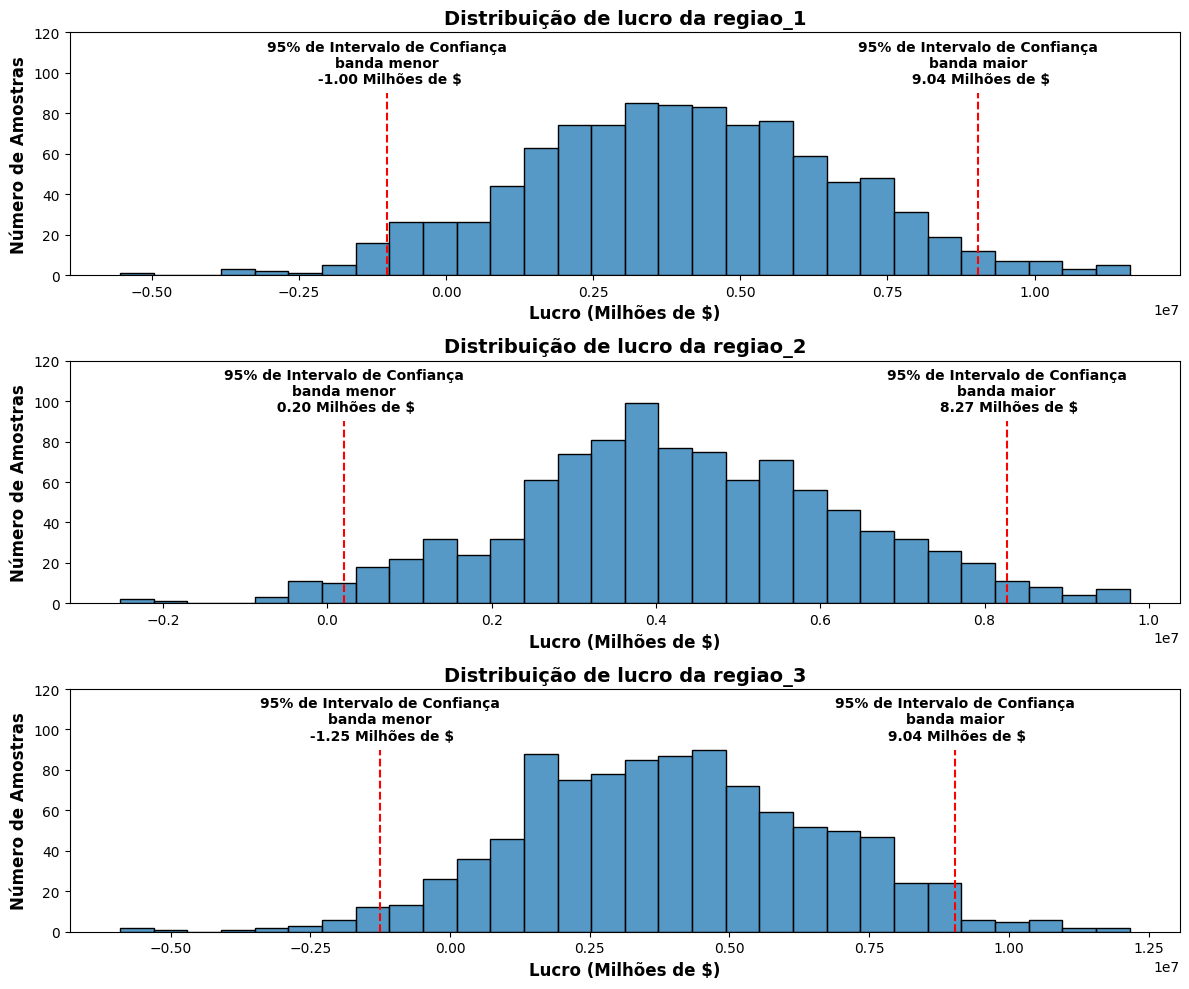

In [21]:
# Plot a histogram to show the distribution of profit for each region
fig, axs = plt.subplots(3, 1, figsize=(12,10))

for i, region in enumerate(regioes):
    sns.histplot(x=sample_profits[region], bins=30, ax=axs[i])
    axs[i].set_title(f'Distribuição de lucro da {region}', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Lucro (Milhões de $)', fontsize=12, fontweight='bold')
    axs[i].set_ylabel('Número de Amostras', fontsize=12, fontweight='bold')
    lb = sample_result[region]['95%_CI_lower_bound']
    ub = sample_result[region]['95%_CI_upper_bound']
    axs[i].vlines(x=lb, ymin=0, ymax=90, label='lower', colors='red', ls='--')
    axs[i].text(lb, 95, f'95% de Intervalo de Confiança\nbanda menor\n {lb / 1e6:.2f} Milhões de $', fontweight='bold', ha='center')
    axs[i].vlines(x=ub, ymin=0, ymax=90, label='upper', colors='red', ls='--')
    axs[i].text(ub, 95, f'95% de Intervalo de Confiança\nbanda maior\n {ub / 1e6:.2f} Milhões de $', fontweight='bold', ha='center')    
    axs[i].set_ylim(0,120)
    
plt.tight_layout()
plt.show()

In [24]:
region_data = []

for i, value in sample_result.items():
    region_data.append(value)
    
region_result_df = pd.DataFrame({'region': regioes, 'data': region_data})
region_result_df = pd.concat([region_result_df['region'], pd.json_normalize(region_result_df['data'])], axis=1)

region_result_df

,region,avg_profit,95%_CI_lower_bound,95%_CI_upper_bound,risk_of_losses
0,regiao_1,3.995089e+06,-1.001272e+06,9.041102e+06,7.30%
1,regiao_2,4.293228e+06,2.032159e+05,8.266973e+06,1.90%
2,regiao_3,3.965886e+06,-1.254271e+06,9.036296e+06,5.80%
